<p style="color:#FFF; background:#06D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Version 2025-06</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC–BY–NC–ND</span>
<span style="font-size:40px; font-style:normal"><b>PACKAGE : MATPLOTLIB</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick ಄ u<b>-</b>bordeaux • fr</p>

Le package [**matplotlib**](https://matplotlib.org) fournit à Python un ensemble d'outils très complets pour créer des visualisations scientifiques, qu'elles soient statiques, interactives ou animées. La documentation complète du package se trouve sur le site officiel [**matplotlib.org**](https://matplotlib.org/stable/users), mais une copie locale est directement disponible dans le menu **`Help`** de JupyterLab, sous le titre ***Matplotlib Reference***.

Le package **matplotlib** est extrêmement riche en termes de fonctionnalités, et cette richesse implique une certaine complexité de mise en oeuvre. Mais en fait, la difficulté principale rencontrée durant la phase d'apprentissage des outils de visualisation disponibles, réside dans le fait que la bibliothèque peut s'utiliser selon ***deux modes totalement incompatibles*** : un mode de base (appelé ***state-mode***) qui reprend globalement le processus mis en oeuvre dans Matlab (également repris dans R-Studio), et un mode plus avancé (appelé ***object-mode***) qui utilise le paradigme objet disponible en Python pour manipuler les figures comme des objets graphiques dont on peut contrôler l'ensemble des paramètres. Malheureusement, les tutos disponibles sur le web, utilisent l'un ou l'autre de ces modes sans forcément le préciser, et tenter de combiner des bouts de code utilisant deux modes différents est voué à l'échec, et va produire des erreurs très difficilement compréhensibles.

Ce chapitre a pour objet de faire un tour d'horizon rapide et de montrer les fonctionnalités les plus utiles de **matplotlib** dans le cadre d'une utilisation dans le domaine des Sciences des Données. En particulier, on va **se limiter au** ***state-mode*** qui est suffisamment flexible pour le type de visualisations abordées. Une fois que l'on a maîtrisé les concepts de base du package, le plus efficace est de se reporter à la [**galerie des exemples**](https://matplotlib.org/stable/gallery) sur le site de Matplotlib, pour piocher le code associé au type de visualisation qu'on souhaite mettre en oeuvre. Il faut noter que le point fort de **matplotlib** réside dans sa collaboration étroite avec le package **numpy** qui va permettre une visualisation performante pour les données continues 1D ou 2D, ou pour les matrices 2D homogènes. Il est nettement moins adapté pour la visualisation de données discrètes hétérogènes, telles qu'on les rencontre fréquemment en Science des Données. Pour ce genre d'application, il est préférable de passer par les conteneurs fournis par le package **pandas** et par les outils de visualisation des bibliothèques **seaborn** ou **plotly** qui seront abordés dans des chapitres 8 et 12, respectivement.

In [1]:
import warnings; warnings.filterwarnings('ignore') # suppression des 'warning' de l'interpréteur
from SRC.tools import show, inspect # import des fonctions utilitaires du module 'tools'
import numpy as np # le package 'numpy' est indispensable pour 'matplotlib'

---
On importe habituellement le package **matplotlib** par le biais d'un alias court, avec l'une des deux commandes suivantes :
> **`import matplotlib.pyplot as mp`** &emsp;ou&emsp; **`import matplotlib.pyplot as plt`**

In [2]:
import matplotlib.pyplot as mp # import du package 'matplotlib' avec l'alias habituel 'mp'

Comme d'habitude, la fonction **`inspect`** permet d'avoir un aperçu général du contenu du package, qui contient plus de 40 types de données et près de 200 fonctions au total :

In [3]:
inspect(mp, detail=0) # augmenter la valeur de 'detail' pour avoir plus d'informations

● NAME = matplotlib.pyplot / TYPE = module
● ROLE = `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
  an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
  screen, and acts as the figure GUI manager.

● MODULES : use 'inspect(matplotlib.pyplot.xxx)' to get additional info for each inner module
cbook       cm          functools   importlib   inspect     logging     matplotlib  mlab        
np          rcsetup     style       sys         threading   time        

● TYPES : use 'inspect(matplotlib.pyplot.xxx)' to get additional info for each inner type
AbstractContextManager  Annotation              Arrow                   Artist                  
AutoLocator             AxLine                  Axes                    BackendFilter           
Button                  Circle                  Colorizer               ColorizingArtist        
Colormap                Enum                    ExitStack               Figure                  
FigureB

---
Généralement, au début d'un notebook qui utilise le package **`matplotlib`**, on va choisir un **style** parmi une liste de ***styles prédéfinis*** pour contrôler l'aspect esthétique des visualisations : 

In [4]:
mp.style.use('default') # styles usuels : default / classic / grayscale / bmh / ggplot / seaborn
show('mp.style.available') # affichage des styles disponibles

mp.style.available ➤ ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Avec l'environnement Jupyter, les figures générées par **matplotlib** sont automatiquement converties en matrices de pixels, puis insérées dans le notebook après la cellule ayant créé la figure. Ce comportement par défaut peut être modifié avec la commande magique **`%matplotlib <mode>`** qui propose plusieurs modes d'affichage :

- **`%matplotlib inline`** : inclusion des figures statiques dans le notebook (mode par défaut)
- **`%matplotlib ipympl`** : ajout d'une barre d'interaction (via installation de la bibliothèque **ipympl**)
- **`%matplotlib tk`** : affichage dans un popup interactif (via installation de la bilbiothèque **tk**)
- **`%matplotlib qt`** : affichage dans un popup interactif (via installation de la bibliothèque **qt**)

En pratique, le mode **`inline`** est bien adapté pour l'inclusion de figures statiques, comme on le ferait dans un document scientifique destiné à être imprimé. Les trois autres modes apportent assez peu de fonctionnalités supplémentaires. De plus, comme on le verra dans la section D de ce chapitre, le mode **`inline`** peut également interagir avec d'autres modules, tels que **`ipywidgets`** ou **`jshtml`**, pour rajouter de l'***interaction*** ou de l'***animation*** dans les figures générées, ce qui est plus complexe à mettre en oeuvre avec les modes **`ipympl`**, **`tk`** ou **`qt`**. Ceci dit, si l'on souhaite obtenir un contrôle interactif très précis et très flexible pour la visualisation, il est préférable de s'orienter vers des bibliothèques d'affichage plus modernes, comme par exemple le package **`plotly`** qui sera détaillé au chapitre 12

In [5]:
# mode d'affichage actif
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


---
Pour maîtriser les outils fournis par **matplotlib**, il est important de bien identifier les différentes composantes mises en oeuvre dans la création des figures. L'image ci-dessous, extraite de la documentation officielle du package, permet de lister le vocabulaire utilisé et les noms des fonctions associées :

<center><img src='IMG/anatomy.svg' width=420></center>

<h2 style="padding:16px; color:#FFF; background:#06D">A - Visualisation de données 1D</h2>

La visualisation de données à une dimension s'effectue à l'aide des fonctions `plot` ou `bar`

### 1 - Visualisation de données discrètes : $\small \{z_k \;{\sf pour}\; k \in [0\!:\!n]\}$

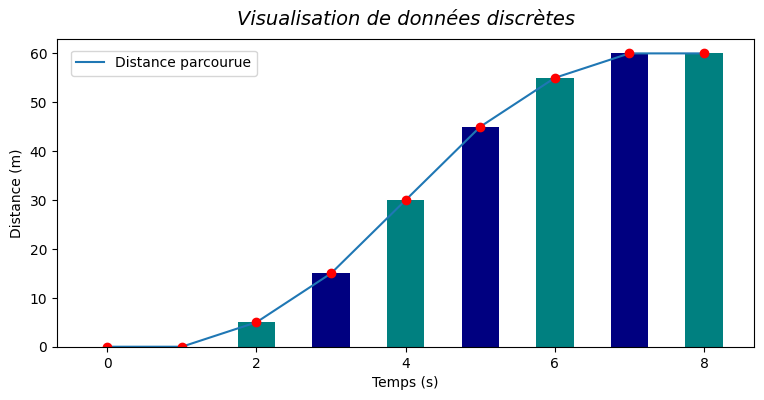

In [6]:
time = [0, 1, 2, 3, 4, 5, 6, 7, 8]
dist = [0, 0, 5, 15, 30, 45, 55, 60, 60]

mp.figure(figsize=(9,4), dpi=100) # taille (en pouces) et précision (en points par pouce)
mp.plot(time, dist) # affichage sous forme de segments bleus (par défaut)
mp.plot(time, dist, 'or') # affichage sous forme de disques (= 'o') rouges (= 'r')
mp.bar(time, dist, width=0.5, color=('teal','navy')) # affichage sous forme de barres verticales
mp.xlabel('Temps (s)') # label pour l'axe des 'x'
mp.ylabel('Distance (m)') # label pour l'axe des 'y'
mp.legend(['Distance parcourue'], loc=(0.02, 0.88)) # légende
mp.title('Visualisation de données discrètes', pad=10, fontsize=14, style='italic'); # titre
mp.savefig('IMG/plot.png') # conversion en image au format PNG (résolution = figsize * dpi)
mp.savefig('IMG/plot.svg') # conversion en tracé au formmt SVG (toute résolution)

---
### 2 - Visualisation d'histogrammes

rolls.shape ➤ (4, 60000)
rolls ➤
[[2 2 5 ... 6 2 3]
 [6 5 3 ... 3 3 2]
 [3 3 4 ... 2 1 4]
 [4 5 2 ... 6 2 4]]


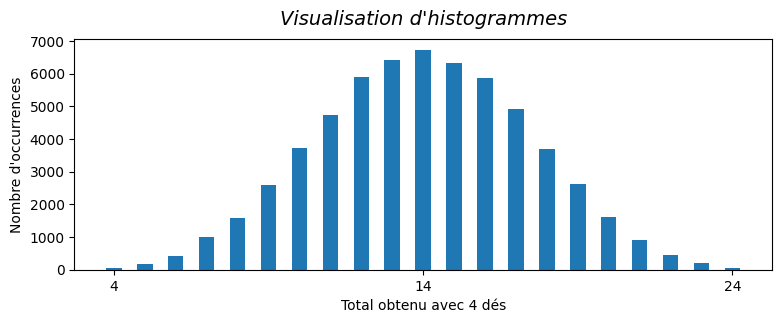

In [7]:
nd, nf, nr = 4, 6, 60000 # nb de dés, nb de faces par dé et nb de lancers (rolls) simulés
rolls = np.random.randint(1, 1+nf, (nd, nr)) # génération des lancers aléatoires de dés
show("rolls.shape; rolls#") # on affiche la matrice correspondant aux lancers obtenus

mp.figure(figsize=(9,3), dpi=100) # choix de la taille et de la précision
#mp.hist(rolls.sum(axis=0), bins=range(nd, nd*nf+2), align='left') # affichage de l'histogramme
mp.bar(range(nd, nd*nf+1), np.bincount(rolls.sum(axis=0))[nd:], width=0.5) # alternative avec 'bar'
mp.xticks([nd, nd*(1+nf)//2, nd*nf]) # graduation horizontale (uniquement min, médiane et max)
mp.xlabel(f"Total obtenu avec {nd} dé{'s '[nd<2]}"); mp.ylabel("Nombre d'occurrences") # labels
mp.title("Visualisation d'histogrammes", pad=10, fontsize=14, style='italic'); # et titre

---
### 3 - Visualisation de fonctions cartésiennes : $y = f(x)$

In [8]:
def f(x):
  """Hermite step function"""
  return x*x*(3-2*x)

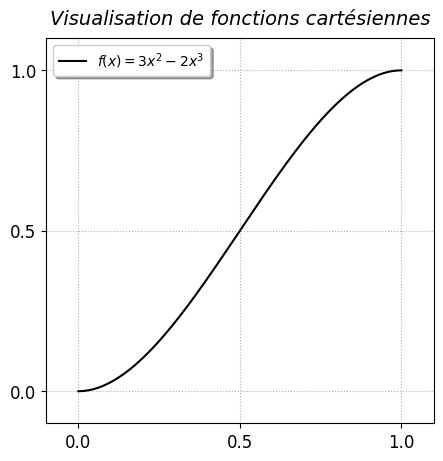

In [9]:
n = 200 # nombre d'échantillons
x = np.linspace(0, 1, n) # échantillonnage de l'intervalle [0,1] en 'n' valeurs uniformes
y1 = f(x) # fonction sans bruit
y2 = f(x) * (1.0 + 0.05*np.random.uniform(-3, 3, n)) # ajout d'un bruit multiplicatif uniforme
y3 = f(x) * (1.0 + 0.05*np.random.normal(0, 1, n)) # ajout d'un bruit multiplicatif gaussien

mp.figure(figsize=(5,5), dpi=100) # choix de la taille et de la précision
mp.plot(x, y1, 'k-', label='$f(x) = 3x^2-2x^3$') # tracé sous forme de segments ('-') noirs ('k')
#mp.plot(x, y1, 'k-', label='Courbe de base') # tracé sous forme de segments ('-') noirs ('k')
#mp.plot(x, y2, 'bo', label='Bruit uniforme', ms=3) # tracé sous forme de disques ('o') bleus ('b')
#mp.plot(x, y3, 'r*', label='Bruit gaussien', ms=4) # tracé sous forme d'étoiles ('*') rouges ('r')
mp.legend(loc='upper left', shadow=True) # ajout de la légende avec les labels des courbes
mp.axis([-0.1, 1.1, -0.1, 1.1]) # amplitude des axes [xmin, xmax, ymin, ymax]
mp.xticks([0,0.5,1], size='large'); mp.yticks([0,0.5,1], size='large') # graduation des axes
mp.grid(linestyle=':') # style de grille ('-' = trait continu, ':' = trait pointillé)
mp.title('Visualisation de fonctions cartésiennes', pad=10, fontsize=14, style='italic');

---
### 4 - Visualisation de fonctions polaires : $r = f(\theta)$

In [10]:
def fr(theta):
  """quadrifolium spiral (polar definition)"""
  return theta/50 - np.cos(4*theta) + np.sin(4*theta)**2

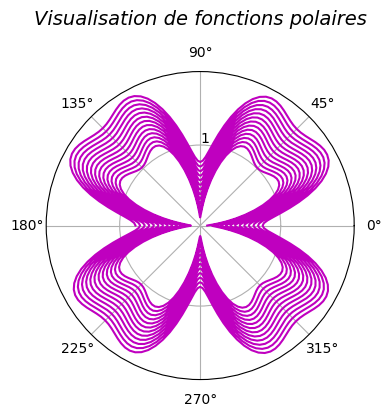

In [11]:
n = 2000 # nombre d'échantillons
theta = np.linspace(0, 25*np.pi, n) # échantillonnage de l'intervalle [0,25*pi] en 'n' valeurs
r = fr(theta) # calcul des rayons associés aux différents angles polaires

mp.figure(figsize=(4,4), dpi=100) # choix de la taille et de la précision
axes = mp.subplot(projection='polar') # création d'un tracé avec projection polaire
mp.plot(theta, r, 'm-') # tracé sous forme de segments ('-') de couleur magenta ('m')
axes.set_rticks([1]); axes.set_rlabel_position(90) # position des labels de l'axe 'r'
mp.title('Visualisation de fonctions polaires', pad=15, fontsize=14, style='italic');

<h2 style="padding:16px; color:#FFF; background:#06D">B - Visualisation de données 2D</h2>

La visualisation de données à deux dimensions s'effectue à l'aide des fonctions `plot_surface` et `scatter`

### 1 - Visualisation de données éparses : $\small \{(x_k,y_k) \;{\sf pour}\; k \in [0\!:\!n]\}$

samples.shape ➤ (500, 2)
choices.shape ➤ (100, 2)

samples[:3] ➤
[[-0.10185487 -0.66866728]
 [-0.67783396  0.66175412]
 [-2.48836941 -1.23582026]]

*samples.T[:,:3] ➤
[-0.10185487 -0.67783396 -2.48836941] [-0.66866728  0.66175412 -1.23582026]


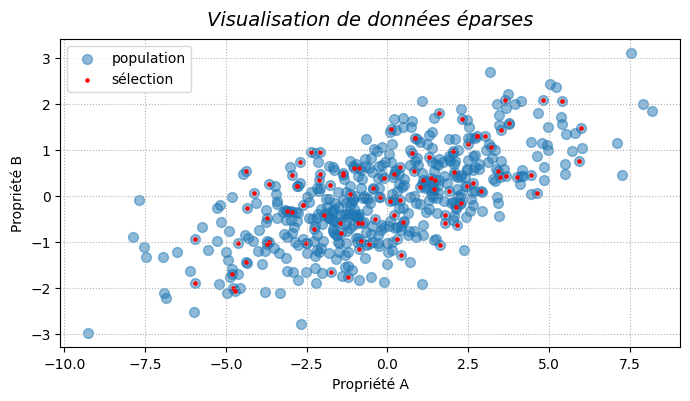

In [12]:
n, mean, covar = 500, [0,0], [[9,2], [2,1]] # nb d'échantillons, moyenne et matrice de covariance
samples = np.random.multivariate_normal(mean, covar, n) # échantillonnage multivarié en loi normale
choices = samples[np.random.choice(range(n), n//5)] # sélection aléatoire d'un échantillon sur cinq
show("samples.shape; choices.shape;; samples[:3]#;; *samples.T[:,:3]#")

mp.figure(figsize=(8,4), dpi=100) # choix de la taille et de la précision
mp.scatter(*samples.T, s=50, alpha=0.5); mp.scatter(*choices.T, s=5, c='r') # affichage des données
mp.grid(linestyle=':'); mp.xlabel('Propriété A'); mp.ylabel('Propriété B'); # grille et labels
mp.legend(['population','sélection'],loc='upper left') # légende
mp.title('Visualisation de données éparses', pad=10, fontsize=14, style='italic'); # titre

---
### 2 - Visualisation de fonctions paramétriques : $x=f(t) \;,\; y=g(t)$

In [13]:
def fxy(t):
  """lissajous curve (parametric definition)"""
  return np.sin(6*t), np.sin(17*t)

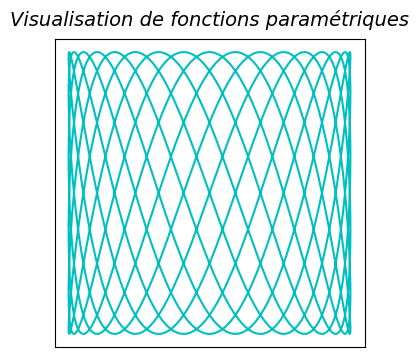

In [14]:
n = 2000 # nombre d'échantillons
t = np.linspace(0, 2*np.pi, n) # échantillonnage de l'intervalle [0,2*pi] en 'n' valeurs
x, y = fxy(t) # échantillonnage des coordonnées 'x' et 'y' de la fonction

mp.figure(figsize=(4,4), dpi=100) # choix de la taille et de la précision
mp.plot(x, y, 'c-') # tracé sous forme de segments ('-') cyan ('c')
mp.axis('equal') # on force la même échelle sur les deux axes
mp.xticks([]); mp.yticks([]) # suppression des graduations sur les axes
mp.title('Visualisation de fonctions paramétriques', pad=10, fontsize=14, style='italic');

---
### 3 - Visualisation de surfaces d'élévation : $z = f(x,y)$

In [15]:
def fz(x, y, args):
  """sum of two-dimensional Gaussian lobes"""
  return sum([c*np.exp(-(a*x-a*u)**2-(b*y-b*v)**2) for u,v,a,b,c in args])
  #return np.exp(-2*x*x-2*y*y)*np.cos(10*(x*x+y*y)) # onde isotrope avec amortis£sement gaussien 

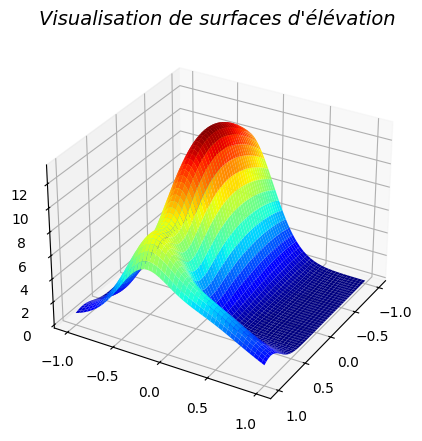

In [16]:
from mpl_toolkits.mplot3d import axes3d # par défaut, les axes 3D ne sont pas importés
m, n = 3, 200 # nombre de lobes, nombre d'échantillons en x et y
x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n)) # échantillonnage de la grille (x,y)
ranges = [(-1,1), (-1,1), (1,5), (1,5), (5,10)] # amplitudes de variation des paramètres des lobes
args = np.array([np.random.uniform(a,b,m) for (a,b) in ranges]).T # choix aléatoire des paramètres
z = fz(x, y, args) # calcul de l'altitude pour chaque couple (x,y) de la grille

# enlever le commentaire de la ligne suivante pour créer une visualisation interactive
#%matplotlib tk
# enlever le commentaire de la ligne suivante pour réinsérer la figure dans le notebook
#%matplotlib inline

mp.figure(figsize=(5,5), dpi=100) # choix de la taille et de la précision
axes = mp.subplot(projection='3d') # création d'un tracé avec projection 3D
#axes.plot_wireframe(x, y, z, linewidth=0.5) # affichage du maillage de la surface d'élévation
axes.plot_surface(x, y, z, cmap='jet') # affichage de la surface d'élévation (résolution automatique)
#axes.plot_surface(x, y, z, rstride=1, cstride=1, cmap='jet') # affichage haute résolution
axes.set_xticks([-1, -0.5, 0, 0.5, 1]); axes.set_yticks([-1, -0.5, 0, 0.5, 1]) # graduation des axes
axes.view_init(elev=30, azim=30) # angles de vue (élévation et azimuth)
mp.title("Visualisation de surfaces d'élévation", pad=10, fontsize=14, style='italic');

<h2 style="padding:16px; color:#FFF; background:#06D">C - Visualisation de matrices de données</h2>

La visualisation de matrices de données s'effectue à l'aide de la fonction `imshow`. Pour mieux interpréter les variations des valeurs, on utilise une palette de couleur (***colormap***) qui permet d'associer une couleur unique pour chaque valeur scalaire stockée dans la matrice. Le choix s'effectue en spécifiant le nom de la palette choisie via le paramètre **`cmap`** de la fonction **`imshow`**. Il existe plusieurs dizaines de palettes prédéfinies utilisables dans **`matplotlib`**, qui sont regroupées sur [**cette page web**](https://matplotlib.org/stable/gallery/color/colormap_reference.html), mais concrètement seule une petite douzaine sera utile en pratique : 

> ***viridis ● gray ● jet ● hot ● hsv ● rainbow ● prism ● flag ● seismic ● Blues ● Greens ● Reds***

La palette par défaut, appelée **`viridis`**, correspond à un dégradé jaune-vert-bleu et a été choisie pour fournir un bon contraste, à la fois lorsqu'on la visualise en couleur sur un écran et lorsqu'on l'imprime sur papier en noir et blanc. Une autre palette très souvent utilisée s'appelle **`jet`** et correspond à la gradation entre couleurs froides et couleurs chaudes, utilisée depuis très longtemps en visualisation scientifique, pour établir des [**cartes thermiques**](https://fr.wikipedia.org/wiki/Carte_thermique) ou [***heatmaps***](https://en.wikipedia.org/wiki/Heat_map) en anglais. Il faut noter que pour chaque palette, il existe une version inversée, obtenue en rajoutant le suffixe **`_r`** (comme ***"reverse"***) au nom de la palette (par exemple, **`gray_r`** donne une image en négatif).

D'autre part, on peut également sélectionner le type d'interpolation qui sera employé pour trouver les valeurs à afficher entre les échantillons fournis par la matrice de données. Il existe une vingtaine de modes d'interpolation utilisables dans **`matplotlib`**, qui sont regroupés sur [**cette page web**](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html), mais là encore, seul un petit nombre sera utilisé au quotidien :

> ***nearest ● bilinear ● bicubic ● gaussian ● sinc ● lanczos***

Le mode d'interpolation par défaut, appelé **`nearest`** correspond à une fonction constante par morceaux (chaque échantillons est étalé dans son voisinage sous la forme d'un carré), tandis que les autres modes permettent une interpolation plus ou moins lisse entre les échantillons.

---
### 1 - Visualisation de matrices scalaires : $\small\{z_{ij} \;{\sf pour}\; i \in [0\!:\!n]\; j \in [0\!:\!m]\}$

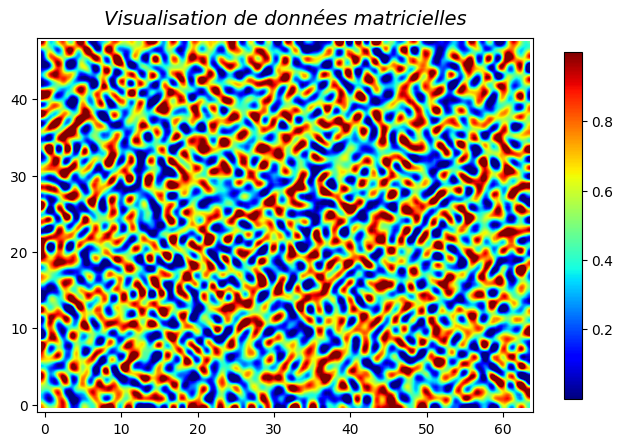

In [17]:
m, n = 48, 64 # taille de la matrice !! ordre matriciel et non cartésien pour les indices !!
data = np.random.rand(m, n) # distribution aléatoire uniforme sur [0,1]
#data = np.random.normal(0, 1, (m, n)) # distribution normale (moyenne = 0, écart-type = 1)
#data = np.add.outer(range(m),range(n)) # table d'addition [0,m[ x [0,n]
#data = np.outer(range(m),range(n)) # table de multiplication [0,m[ x [0,n]

mp.figure(figsize=(8,5), dpi=100) # choix de la taille et de la précision
#mp.imshow(data) # affichage sans interpolation et avec échelle de couleurs par défaut ('viridis')
#mp.imshow(data, cmap='jet') # idem avec échelle spécifique ('jet' = couleurs froides --> chaudes)
mp.imshow(data, cmap='jet', interpolation='sinc') # idem avec interpolation spécifique (sinus cardinal)
mp.colorbar(shrink=0.9) # affichage de la gradation colorimétrique
mp.axis([-1,n,-1,m]) # amplitude des axes [xmin,xmax,ymin,ymax] !! ordre cartésien et non matriciel !!
mp.title('Visualisation de données matricielles', pad=10, fontsize=14, style='italic');

---
### 2 - Visualisation de courbes de niveau : $z = f(x,y)$

In [18]:
def fz(x, y, args):
  """sum of two-dimensional Gaussian lobes"""
  return sum([c*np.exp(-(a*x-a*u)**2-(b*y-b*v)**2) for u,v,a,b,c in args])

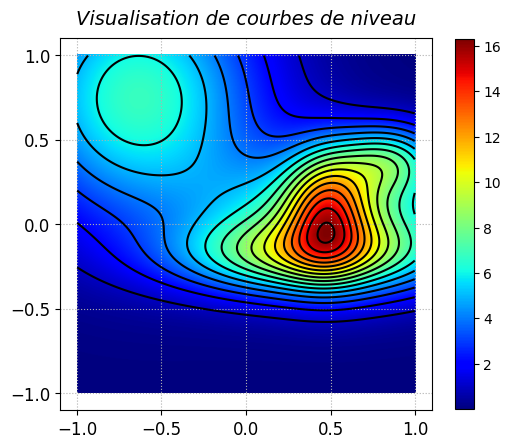

In [19]:
m, n = 5, 500 # nombre de lobes gaussiens, nombre d'échantillons en x et y
x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n)) # échantillonnage de la grille (x,y)
domains = [(-1,1), (-1,1), (1,5), (1,5), (5,10)] # domaines de variation pour les paramètres des lobes
args = np.array([np.random.uniform(a,b,m) for (a,b) in domains]).T # choix aléatoire des paramètres
z = fz(x, y, args) # calcul de l'altitude pour chaque couple (x,y) de la grille

mp.figure(figsize=(6,6), dpi=100) # choix de la taille et de la précision
mp.imshow(z, extent=[-1, 1, -1, 1], cmap='jet') # affichage de la fonction d'élévation en fausses couleurs
mp.colorbar(shrink=0.8) # affichage de la gradation colorimétrique
mp.contour(z, 16, extent=[-1, 1, -1, 1], origin='image', colors='k') # affichage des lignes de niveaux
mp.xticks([-1, -0.5, 0, 0.5, 1], size='large'); mp.yticks([-1, -0.5, 0, 0.5, 1], size='large')
mp.axis([-1.1, 1.1, -1.1, 1.1]); mp.grid(linestyle=':') # grille et limite des axes
mp.title('Visualisation de courbes de niveau', pad=10, fontsize=14, style='italic');

---
### 3 - Visualisation d'images RGB

Les fonctions **`imread(filename)`** et **`imsave(image, filename)`** permettent respectivement de charger une image depuis un fichier sur disque sous la forme d'une matrice **numpy**, et d'enregistrer une image dans un fichier. A l'origine, seul le format BMP (matrice de pixels non compressée) était reconnu par ces deux fonctions, mais depuis la version 2.0 de **`matplotlib`**, ces fonctions font appel de manière transparente, aux fonction **`open`** et **`save`** de la [**bibliothèque Pillow**](https://pillow.readthedocs.io/en/stable/) et permettent ainsi de charger ou sauvegarder les images dans plus d'une trentaine de formats différents.

RGB.shape ➤ (480, 640, 3)
RGB.dtype ➤ uint8


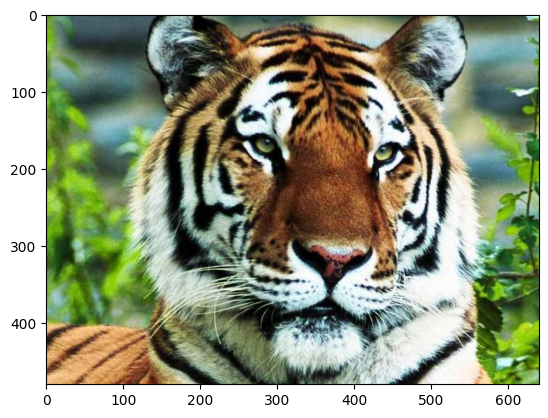

In [20]:
RGB = mp.imread('IMG/tiger.jpg') # lecture de l'image sur disque
show("RGB.shape; RGB.dtype") # affichage des caractéristiques de l'image
mp.imshow(RGB); # affichage de l'image avec les paramètres par défaut

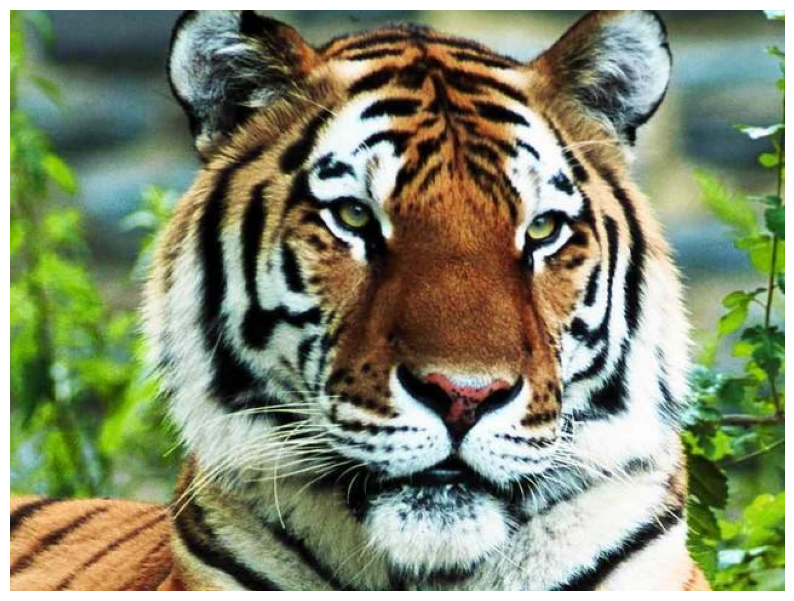

In [21]:
mp.figure(figsize=(10,10)); mp.axis(False) # la hauteur s'adapte automatiquement par rapport à la largeur
mp.imshow(RGB); # affichage avec choix de la taille et suppression des axes

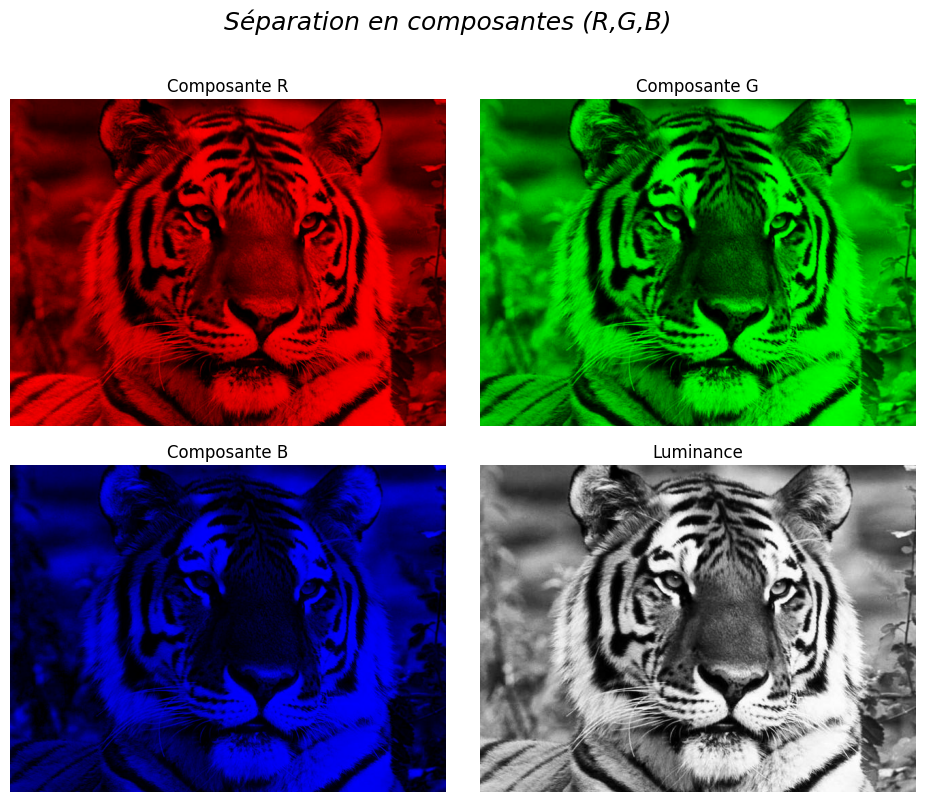

In [22]:
R, G, B = np.split(RGB, 3, axis=2) # séparation de l'image en 3 canaux R, G, B
L = (0.299*R + 0.587*G + 0.114*B).astype('u1') # conversion de l'image en luminance
Z = np.zeros_like(L) # création d'une image à valeurs nulles (taille et type identiques à 'L')

mp.figure(figsize=(12,9)) # choix de la taille globale de la figure
# chaque appel à 'subplot' crée une nouvelle zone dans la figure principale
mp.subplot(221) # 221 = image 1 [NW] d'une grille 2x2 # mp.subplot(2,2,1) donne la même chose
mp.imshow(np.dstack([R, Z, Z])); mp.axis(False); mp.title('Composante R')
mp.subplot(222) # 222 = image 2 [NE] d'une grille 2x2
mp.imshow(np.dstack([Z, G, Z])); mp.axis(False); mp.title('Composante G')
mp.subplot(223) # 223 = image 3 [SW] d'une grille 2x2
mp.imshow(np.dstack([Z, Z, B])); mp.axis(False); mp.title('Composante B')
mp.subplot(224) # 224 = image 4 [SE] d'une grille 2x2
mp.imshow(np.dstack([L, L, L]));mp.axis(False); mp.title('Luminance')
mp.subplots_adjust(wspace=0.02, hspace=0.12) # choix de l'espace entre les cases de la grille
mp.suptitle("Séparation en composantes (R,G,B)", fontsize=18, style='italic'); # titre global

<h2 style="padding:16px; color:#FFF; background:#06D">D - Interaction et Animation</h2>

La bibliothèque **matplotlib** a été créée à une époque où les documents scientifiques étaient destinés à être imprimés, dans des rapports, des mémoires ou des journaux scientifiques. C'est pourquoi les fonctions listées ci-dessus génèrent par défaut des figures statiques. De nos jours, les ***supports dynamiques*** (pages web ou notebooks) sont de plus en plus privilégiés pour la diffusion de documents scientifiques, car ils ajoutent deux fonctionnalités importantes que ne permet pas le document imprimé : les notions d'**interaction** et d'**animation**. Pour suivre cette évolution, la bibliothèque **matplotlib** a été étendue pour inclure certains outils permettant d'interagir ou d'animer les figures générées. Même si ces extensions, présentées ci-dessous, remplissent leur rôle, il existe néanmoins des bibliothèque alternatives qui offrent plus de flexibilité lorsqu'on souhaite créer des figures dynamiques. Le chapitre 12 présentera notamment la bibliothèque [**plotly**](https://plotly.com/graphing-libraries) qui est en passe de devenir un standard dans les applications interactives liées aux Sciences des Données, notamment parce qu'elle possède des ***wrappers*** dans plusieurs langages de programmation

---
### 1 - Interaction

Comme on l'a vu dans le chapitre 4, le package [**ipywidgets**](https://github.com/jupyter-widgets/ipywidgets) permet d'ajouter un ensemble de widgets d'interaction pour modifier les paramètres des fonctions contenues dans un notebook, sans être obligé de modifier les cellules de code correspondantes. Ce package fonctionne bien évidemment avec les fonctions graphiques de **matplotlib**, l'idée étant de réaliser la même séparation que pour les fonctions non-graphiques : d'une côté, une fonction de calcul, de l'autre, une fonction d'affichage utilisant le décorateur **`interact`** ou **`interact_manual`** pour définir les intervalles de variation des différents paramètres interactifs :

In [23]:
#%matplotlib inline
from ipywidgets import interact, interact_manual # import des fonctions d'interaction

In [24]:
def lissajous(a, b, n=2000): # fonction de calcul (fonctions paramétriques de Lissajous)
  t = np.linspace(0, 2*np.pi, n) # échantillonnage de l'intervalle [0,2*pi] en 'n' valeurs uniformes
  return np.sin(a*t), np.sin(b*t) # calcul des vecteurs pour les coordonnées x et y

@interact(a=(1,15), b=(1,15)) # décorateur d'interaction (intervalle de variation des paramètres)
def show_lissajous(a=1, b=2): # fonction d'affichage (valeurs par défaut des paramètres)
  x, y = lissajous(a, b) # appel de la fonction de calcul (valeur par défaut pour le paramètre 'n')
  fig = mp.figure(figsize=(4,4)) # choix de la taille de la figure
  #fig.canvas.header_visible = False # suppression de l'affichage du numéro de figure
  #fig.canvas.toolbar_position = 'left' # position de la barre d'outils en bas
  mp.plot(x, y, 'c-'); mp.axis('equal'); mp.xticks([]); mp.yticks([])
  mp.title(f"Lissajous Curve (a={a},b={b})", pad=10, fontsize=14, style='italic')

interactive(children=(IntSlider(value=1, description='a', max=15, min=1), IntSlider(value=2, description='b', …

In [25]:
def curly_lissajous(a, b, c, d, n=20000): # fonction de calcul (lissajous avec orbites)
  t = np.linspace(0, 2*np.pi, n)
  return np.sin(a*t) + d*np.cos(max(a,b)*c*t), np.sin(b*t) + d*np.sin(max(a,b)*c*t)

@interact_manual(a=(1,15), b=(1,15), c=(0,10), d=(0.0,1.0)) # décorateur d'interaction
def show_curly_lissajous(a=1, b=2, c=5, d=0.5): # fonction d'affichage
  x, y = curly_lissajous(a, b, 8*c, 0.25*d) # appel de la fonction de calcul
  mp.figure(figsize=(4,4)) # choix de la taille de la figure
  mp.plot(x, y, 'c-'); mp.axis('equal'); mp.xticks([]); mp.yticks([])
  mp.title(f"Curly Lissajous Curve ({a},{b})", pad=10, fontsize=14, style='italic')

interactive(children=(IntSlider(value=1, description='a', max=15, min=1), IntSlider(value=2, description='b', …

---
### 2 - Animation

Le package **matplotlib** contient un module `animation` qui permet de créer une visualisation graphique incluant une séquence d'animation. Le principe est de créer une séquence d'images à intervalle de temps fixe, et d'utiliser les outils JavaScript du navigateur pour animer ou explorer cette séquence d'images

In [26]:
from matplotlib.animation import FuncAnimation as animation # import de la fonction d'animation
from matplotlib import rc; rc('animation', html='jshtml') # on utilise 'jshtml' pour les animations
import warnings; warnings.filterwarnings('ignore') # on enlève les 'warning' éventuels

In [27]:
N = 250; x, y = lissajous(2, 9, N) # 'N' représente le nb total de frames pour l'animation

def animate(n): data.set_data([x[n]], [y[n]]) # nouvelle position du disque rouge pour une frame 'n'

fig = mp.figure(figsize=(12,3)); mp.xticks([]); mp.yticks([])
mp.plot(x, y, 'k-') # tracé fixe sous forme de segments noirs
data, = mp.plot(x[0], y[0], 'ro', ms=15) # tracé animé sous forme de disque rouge de diamètre 15 pixels
mp.close() # fermeture de l'image statique, après le tracé des différentes composantes
anim = animation(fig, animate, frames=N, interval=25) # création de l'animation (calcul des 'N' frames)

La cellule de code précédente commence par générer la figure Matplotlib avec des commandes **`plot`** standards. La partie statique de la figure (courbe de Lissajous en noir) est simplement affichée une seule fois, alors que la la partie animée (le disque rouge) est affichée et stockée dans la variable **data**. Ensuite, la fonction **`animation`** va calculer les différentes images de l'animation, à l'aide de quatre arguments :
- **`fig`** : la figure Matplotlib contenant le tracé de base
- **`animate`** : la fonction de calculant la position des éléments animés en fonction du numéro de frame
- **`frames`** : le nombre total de frames
- **`interval`** : le délai temporelle (exprimé en ms) entre 2 frames successives pour la visualisation de l'animation

Par défaut, les images calculées pour l'animation sont simplement stockée en mémoire, dans la variable retournée par la fonction **`animation`**. Pour afficher l'animation dans le notebook, on peut utiliser l'une des deux solutions suivantes : soit on peut inclure l'animation directement dans le notebook, en utilisant les fonctionnalités d'affichage vidéo de JupyterLab, soit on peut sauvegarder l'animation dans un fichier externe, en choisissant un format de fichier standard pour les vidéos :

In [28]:
#anim # enlever le '#' en préfixe pour inclure et afficher l'animation directement dans le notebook
# ATTENTION : l'opération prend un peu de temps et surtout beaucoup de mémoire

Il faut savoir que l'inclusion d'une animation matplotlib dans un notebook va **très fortement augmenter la taille sur disque** de ce notebook, car l'intégralité de la séquence d'images nécessaire à l'animation va être stockée au format JSON (c'est-à-dire réencodée sous forme de chaîne de caractères) dans le fichier **`ipynb`** du notebook.

Il est donc beaucoup plus efficace de stocker le résultat de l'animation dans un fichier externe (en choisissant un format standard, soit GIF animé, soit MP4), puis de visualiser ultérieurement ce fichier, en utilisant soit une balise HTML **`<video>`** , soit la fonction **`Video`** fournie par le module **`display`** vu dans le chapitre 4 :

In [29]:
anim.save('IMG/anim.mp4') # conversion de l'animation en MP4 et sauvegarde dans un fichier vidéo

In [30]:
%%html
<video height=180 autoplay loop> <source src='IMG/anim.mp4'> </video>

In [31]:
import IPython.display as dp
dp.Video('IMG/anim.mp4', height=180, html_attributes='autoplay loop')

<div style="padding:8px; margin:0px -20px; color:#FFF; background:#06D; text-align:right">● ● ● </div>